In [1]:
!pip install yfinance

  Using cached yfinance-0.2.54-py2.py3-none-any.whl (108 kB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Using cached frozendict-2.4.6-cp39-cp39-win_amd64.whl (37 kB)
  Using cached peewee-3.17.9.tar.gz (3.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139096 sha256=21f0a32333bad438221ecd80d3ad38f3eff9c1375ef12c984019a44923a35b0e
  Stored in directory: c:\users\rigve\appdata\local\pip\cache\wheels\95\bb\20\859b0853d3683815ccb6342d9ac5a49380a681c96285821184
Successfully built peewee
  Attempting uninst

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.


In [2]:
import yfinance as yf

# Download Tesla stock data
tesla_data = yf.download('TSLA')

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
display(tesla_data.head())  # Better formatting in Jupyter


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


!pip install requests beautifulsoup4 pandas lxml


In [3]:
!pip install requests beautifulsoup4 pandas lxml


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL for Tesla revenue data on MacroTrends
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Send an HTTP request to fetch the webpage
response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
soup = BeautifulSoup(response.text, "html.parser")

# Find the revenue table
tables = soup.find_all("table")

# Extract the correct table containing revenue data
for table in tables:
    if "Tesla Annual Revenue" in table.get_text():
        revenue_table = table
        break

# Extract table data into a DataFrame
rows = revenue_table.find_all("tr")
data = []

for row in rows:
    cols = row.find_all("td")
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)

# Convert to DataFrame
tesla_revenue_df = pd.DataFrame(data, columns=["Date", "Revenue"])
tesla_revenue_df = tesla_revenue_df.dropna()  # Remove empty rows

# Display the last five rows
print(tesla_revenue_df.tail())
""

    Date Revenue
12  2013  $2,013
13  2012    $413
14  2011    $204
15  2010    $117
16  2009    $112


''

In [7]:
import yfinance as yf

# Download GameStop (GME) stock data
gme_data = yf.download('GME')

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows
display(gme_data.head())  # Use 'display()' for better formatting in Jupyter Notebook


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GME,GME,GME,GME,GME
0,2002-02-13,1.691666,1.693350,1.603296,1.620128,76216000
1,2002-02-14,1.683251,1.716074,1.670626,1.712707,11021600
2,2002-02-15,1.674834,1.687458,1.658002,1.683250,8389600
3,2002-02-19,1.607505,1.666418,1.578048,1.666418,7410400
4,2002-02-20,1.662210,1.662210,1.603296,1.615921,6892800


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL for GameStop revenue data on MacroTrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Send an HTTP request to fetch the webpage
response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
soup = BeautifulSoup(response.text, "html.parser")

# Find all tables in the HTML
tables = soup.find_all("table")

# Extract the correct table containing revenue data
gme_revenue_table = None
for table in tables:
    if "GameStop Annual Revenue" in table.get_text():
        gme_revenue_table = table
        break

# Extract table data into a DataFrame
rows = gme_revenue_table.find_all("tr")
data = []

for row in rows:
    cols = row.find_all("td")
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)

# Convert to DataFrame
gme_revenue_df = pd.DataFrame(data, columns=["Date", "Revenue"])
gme_revenue_df = gme_revenue_df.dropna()  # Remove empty rows

# Display the last five rows
print(gme_revenue_df.tail())


    Date Revenue
12  2013  $8,887
13  2012  $9,551
14  2011  $9,474
15  2010  $9,078
16  2009  $8,806


[*********************100%***********************]  1 of 1 completed


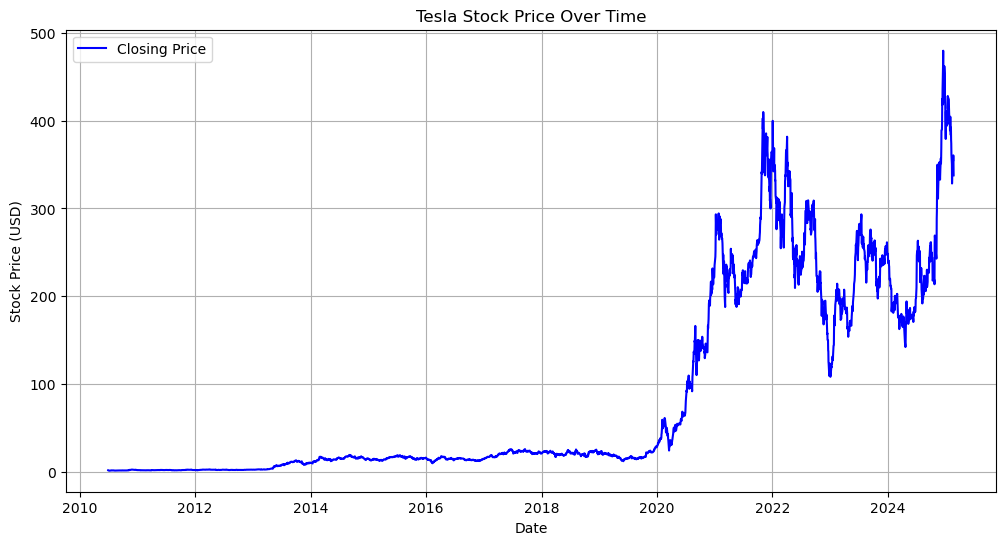

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download Tesla stock data
tesla_data = yf.download('TSLA')

# Define function to create the graph
def make_graph(data, title="Tesla Stock Price Over Time"):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='Closing Price', color='blue')
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot the graph
make_graph(tesla_data)


[*********************100%***********************]  1 of 1 completed


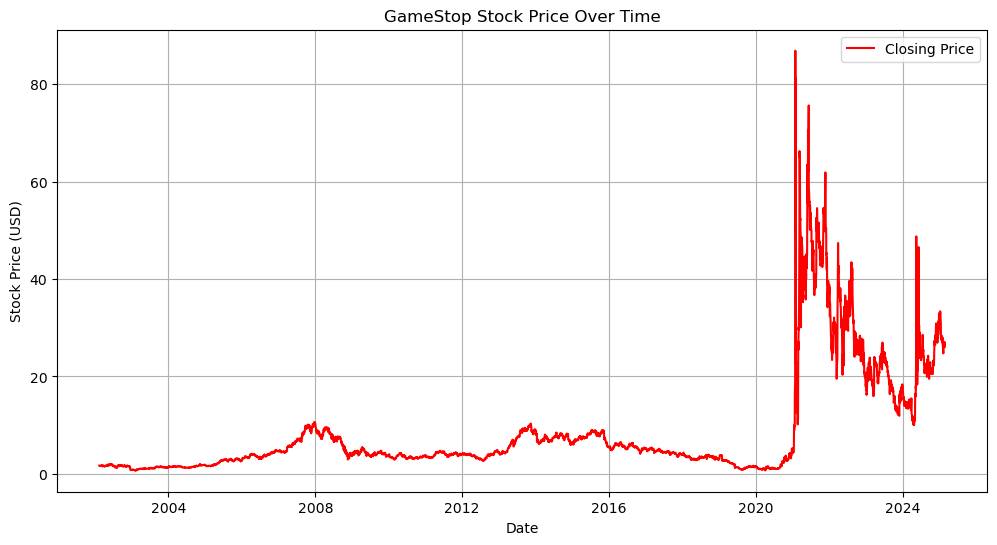

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download GameStop stock data
gme_data = yf.download('GME')

# Define function to create the graph
def make_graph(data, title="GameStop Stock Price Over Time"):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='Closing Price', color='red')
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot the graph
make_graph(gme_data)
